<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [10]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [13]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


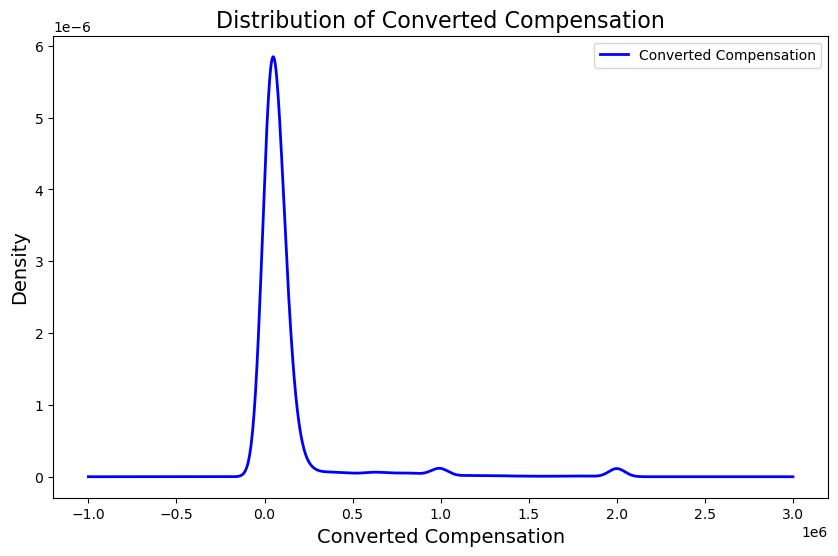

In [18]:
# your code goes here
converted_comp = df['ConvertedComp'].dropna()
# Plot the distribution curve
plt.figure(figsize=(10, 6))
converted_comp.plot(kind='kde', linewidth=2, color='blue', label='Converted Compensation')
plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()


Plot the histogram for the column `ConvertedComp`.


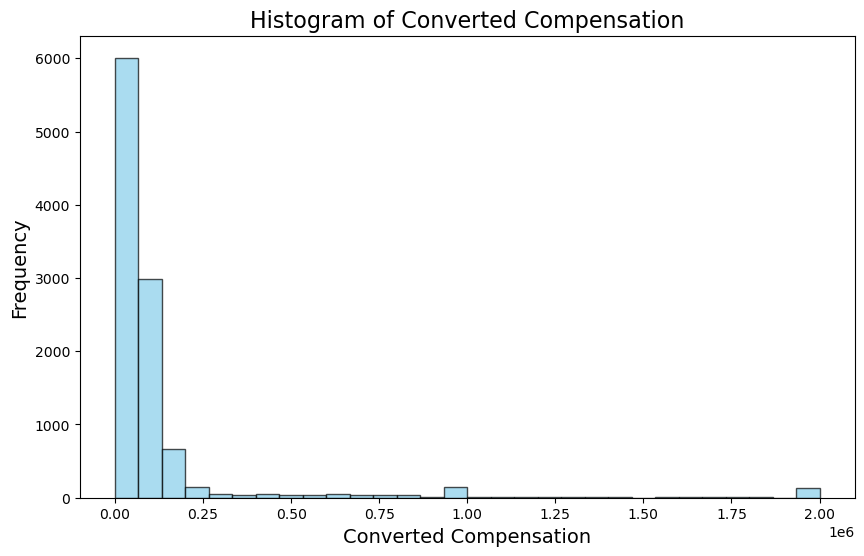

In [20]:
# your code goes here
# Drop NaN values in the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
converted_comp.plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [22]:
# your code goes here
median_value = df['ConvertedComp'].median()
print('The median of the CC column is', {median_value})

The median of the CC column is {57745.0}


How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
total_men = (df['Gender'] == 'Man').sum()
print(total_men)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# your code goes here
woman_data =  df[df['Gender'] == 'Woman']
median_woman = woman_data['ConvertedComp'].median()
print('Median of identifying as Woman is' , median_woman)

    

Median of identifying as Woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
# your code goes here
one = df["Age"].min()
two =df["Age"].quantile(0.25)
three = df["Age"].median()
four = df["Age"].quantile(0.75)
five = df["Age"].max()
print(one,two,three,four,five)


16.0 25.0 29.0 35.0 99.0


Plot a histogram of the column `Age`.


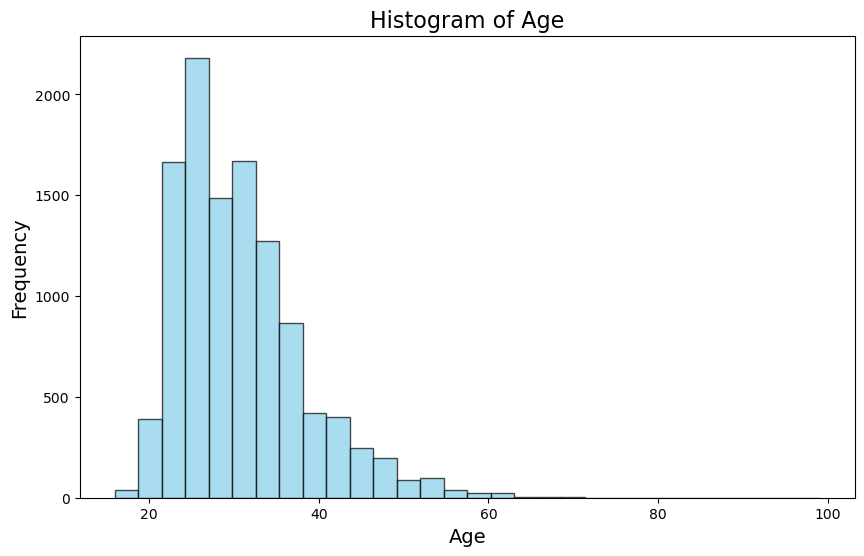

In [38]:
# your code goes here
plt.figure(figsize=(10, 6))
df["Age"].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


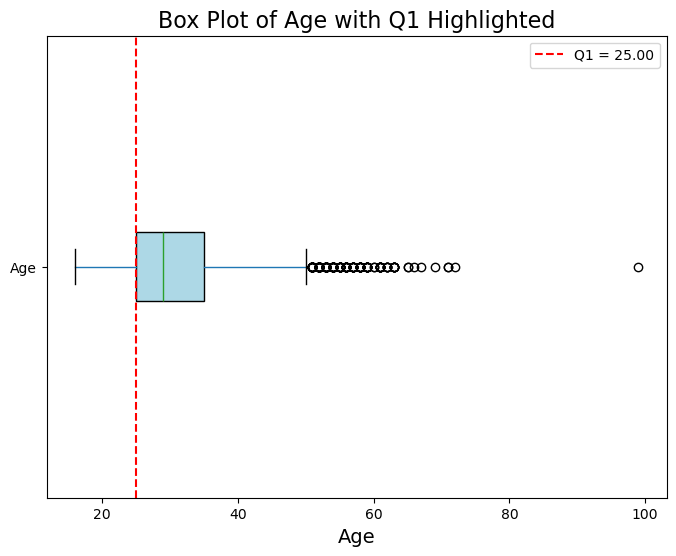

In [135]:
q1_age = df['Age'].quantile(0.25)

# Create the box plot
plt.figure(figsize=(8, 6))
box = df.boxplot(column='Age', grid=False, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Annotate Q1 on the box plot
plt.axvline(q1_age, color='red', linestyle='--', label=f'Q1 = {q1_age:.2f}')
plt.legend(loc='upper right')

# Add labels and title
plt.title('Box Plot of Age with Q1 Highlighted', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:
# your code goes here
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1
print(iqr)
df["ConvertedComp"].median()


73132.0


57745.0

Find out the upper and lower bounds.


In [32]:
# your code goes here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)
print(num_outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [141]:
# your code goes here

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)].copy()

# Ensure the 'ConvertedComp' column is numeric
df_no_outliers['ConvertedComp'] = pd.to_numeric(df_no_outliers['ConvertedComp'], errors='coerce')

# Drop NaN values before calculating the median
median_converted_comp = df_no_outliers['ConvertedComp'].dropna().median()
mean_converted_comp = df_no_outliers['ConvertedComp'].dropna().mean()

print(f"Median of the 'ConvertedComp' column without outliers: {median_converted_comp}")
print(f"Mean of the 'ConvertedComp' column without outliers: {mean_converted_comp}")


Median of the 'ConvertedComp' column without outliers: 52704.0
Mean of the 'ConvertedComp' column without outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [148]:
# your code goes here
correlation_with_age = df.corr()['Age']
sorted_correlation = correlation_with_age.sort_values(ascending=True)

print(sorted_correlation)

SOVisit1st     -0.376657
Age1stCode     -0.045407
CodeRevHrs     -0.020469
Respondent      0.004041
CompTotal       0.006970
                  ...   
Sexuality            NaN
Ethnicity            NaN
Dependents           NaN
SurveyLength         NaN
SurveyEase           NaN
Name: Age, Length: 85, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
